In [14]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
from pandas import *
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

Define a couple of parameters "meaningfully" -> consult the tutorial for help
https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

We want to use the MNIST dataset (not CIFAR)!

In [16]:
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [51]:
device

'cpu'

I chosen to have 20 epochs and 1000 as my training batch size

In [44]:
n_epochs = 20
batch_size_train = 4
batch_size_test = 100
learning_rate = 0.01
momentum = 0.5


Transforming the dataset. And dividing the dataset in training and testing with the respective batch sizes.

In [45]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])
train_set = torchvision.datasets.MNIST('DATA_MNIST/', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size_train, shuffle=True, num_workers=2)

test_set = datasets.MNIST('DATA_MNIST/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size_test,shuffle=False, num_workers=2)


In [19]:
training_data = enumerate(train_loader)
batch_idx, (images, labels) = next(training_data)
print(type(images)) # Checking the datatype 
print(images.shape) # the size of the image
print(labels.shape) # the size of the labels

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


The below plot shows a sample image from the dataset.

Text(0.5, 1.0, 'Test Image')

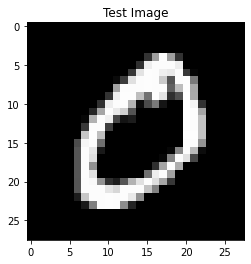

In [29]:
plt.imshow(train_set[1][0][0], cmap = "gray" )
plt.title('Test Image')

Text(0.5, 1.0, 'label 2')

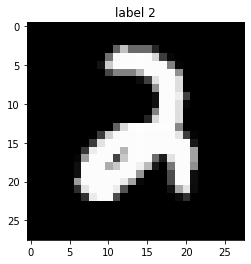

In [21]:
fig = plt.figure()
plt.imshow(images[62][0], cmap='gray')
plt.title("label {}".format(labels[62]))

Now we need to define our convolutional neural network, it should have 1 convolutional layer (I recommend handing over the kernel size as a parameter at construction) and 1 pooling layer followed by other normal layers

You only have one in channel (gray)

the number of out channels is up to you - pick wisely, the same applies to the other weights of the other layers

My below class will be used as my CNN where I have declared all the variables which is been required. I chose to have 10 output features. I chosen to have relu actavitaion function with the softmax function.

In [34]:
class myCNN(nn.Module):
    def __init__(self,kernelSize=2):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32,kernel_size=kernelSize)
        self.pool = nn.MaxPool2d(kernel_size=kernelSize)
        self.fc1 = nn.Linear(in_features=32*13*13, out_features=64)          
        self.fc2 = nn.Linear(in_features=64, out_features=10)
        
    def forward(self, x):
        # I filled in the first two layers
        # do first x=self.conv1(x)
        self.features=F.relu(self.conv1(x))
        x = self.pool(self.features)
        #we need to flatten the whole thing
#         a = x.view(-1, numpy.product(x.shape))
#         x = x.view(x.size(0),-1)
        x = x.view(-1, 32*13*13)
        a = self.fc1(x)
        a = F.relu(a)
#         x = F.relu(self.fc1(x))
        a = self.fc2(a)
        a = F.log_softmax(a,dim=1)
        
        #code is missing here!
        return a

In [52]:
#parameters definition
n_epochs = 10
batch_size_train = 4
batch_size_test = 100
learning_rate = 0.01
momentum = 0.5

In [53]:
Trans=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
train_set = torchvision.datasets.MNIST(root='mnist_data', train=True, download=True,
                             transform=Trans)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size_train, shuffle = True)

test_set = torchvision.datasets.MNIST(root='mnist_data', train=False, download=True,
                             transform=Trans)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size_test, shuffle = False)

100.1%

Extracting mnist_data\MNIST\raw\train-images-idx3-ubyte.gz to mnist_data\MNIST\raw


113.5%

Extracting mnist_data\MNIST\raw\train-labels-idx1-ubyte.gz to mnist_data\MNIST\raw


100.4%

Extracting mnist_data\MNIST\raw\t10k-images-idx3-ubyte.gz to mnist_data\MNIST\raw


180.4%C:\Users\makn0023\Anaconda3\envs\mlc\lib\site-packages\torchvision\datasets\mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting mnist_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to mnist_data\MNIST\raw
Processing...
Done!


In [65]:
class myCNN(nn.Module):
    def __init__(self,kernelSize):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels= 6, kernel_size=kernelSize)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(6*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.output = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 6*6*6)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        return x 

In [66]:
model = myCNN(2)
model

myCNN(
  (conv1): Conv2d(1, 6, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=216, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (output): Linear(in_features=84, out_features=10, bias=True)
)

My below variables have the Classification Cross-Entropy loss and SGD

In [24]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [67]:
def traintest_function():
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
    train_acc = []
    train_final_acc = []
    test_acc = []
    train_counter=[]

    epochs = 4
    test_counter = [i*len(train_loader.dataset) for i in range(epochs)]

    for e in range(epochs):

        train_corrects = 0.0 
        train_batch_loss = 0.0
        train_epoch_loss = 0.0
        val_corrects = 0.0
        val_epoch_loss = 0.0

        # loop through 60000 samples of the train set, 100 at a time
        for batch_idx, data in enumerate(train_loader, start=1):
            inputs = data[0]
            labels = data[1]
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            #define optimizer and loss function
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Return the index of the highest possibility
            # which are the predicted labels
            _, preds = torch.max(outputs, 1)
            train_batch_loss += loss.item()

            # sum up all the correct prediction
            train_corrects += (preds == labels).sum().item()

            # print training loss every 100 mini-batch
            # train_batch_loss is the average loss for 100 mini-batch
            if batch_idx % 100 == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)] Loss: {:.2f}'.format(
                        e + 1 , 
                        batch_idx * len(data[0]), 
                        len(train_loader.dataset),
                        100.* batch_idx * len(data[0]) / len(train_loader.dataset), 
                        train_batch_loss / 100 ))
                train_counter.append(
                 (batch_idx*64) + ((epochs)*len(train_loader.dataset)))
                tr_acc= 100.* batch_idx * len(data[0]) / len(train_loader.dataset)
                train_acc.append(tr_acc)
                # accumulate loss for the epoch
                train_epoch_loss += train_batch_loss
                # reset the loss for every mini-batch
                train_batch_loss = 0.0
        else:
            # torch.no_grad deactivate the auograd engine, 
            # reduce memory usage and speed up computations
            with torch.no_grad():
                for val_data in test_loader:
                    val_inputs = val_data[0]
                    val_labels = val_data[1]
                    val_outputs = model(val_inputs)
                    val_loss = criterion(val_outputs, val_labels)

                    _, val_preds = torch.max(val_outputs, 1)
                    val_epoch_loss += val_loss.item()
                    val_corrects += (val_preds == val_labels).sum().item()


            # print result for every epoch 
            train_accuracy = 100. * train_corrects / len(train_loader.dataset)
            train_final_acc.append(train_accuracy)
            # here batch_idx is the total number of mini-batch = 600
            train_epoch_loss /= batch_idx

            #print('epoch :', (e+1))
            #print('Train set: Accuracy: {}/{} ({:.0f}%), Average Loss: {:.2f}'.format(
             #       train_corrects, len(train_loader.dataset),
              #      train_accuracy, train_epoch_loss))



            val_accuracy = 100. * val_corrects / len(test_loader.dataset)
            test_acc.append(val_accuracy)
            val_epoch_loss /= batch_idx

            print('Test set: Accuracy: {}/{} ({:.0f}%), Average Loss: {:.2f}'.format(
                    val_corrects, len(test_loader.dataset),
                    val_accuracy, val_epoch_loss))
    return train_final_acc, test_acc

In [71]:
model = myCNN(2)
trainAccuracy, testAccuracy = traintest_function() 

Train Epoch: 1 [400/60000 (1%)] Loss: 2.28
Train Epoch: 1 [800/60000 (1%)] Loss: 1.34
Train Epoch: 1 [1200/60000 (2%)] Loss: 0.99
Train Epoch: 1 [1600/60000 (3%)] Loss: 0.78
Train Epoch: 1 [2000/60000 (3%)] Loss: 0.72
Train Epoch: 1 [2400/60000 (4%)] Loss: 0.51
Train Epoch: 1 [2800/60000 (5%)] Loss: 0.44
Train Epoch: 1 [3200/60000 (5%)] Loss: 0.60
Train Epoch: 1 [3600/60000 (6%)] Loss: 0.44
Train Epoch: 1 [4000/60000 (7%)] Loss: 0.45
Train Epoch: 1 [4400/60000 (7%)] Loss: 0.36
Train Epoch: 1 [4800/60000 (8%)] Loss: 0.46
Train Epoch: 1 [5200/60000 (9%)] Loss: 0.48
Train Epoch: 1 [5600/60000 (9%)] Loss: 0.40
Train Epoch: 1 [6000/60000 (10%)] Loss: 0.43
Train Epoch: 1 [6400/60000 (11%)] Loss: 0.44
Train Epoch: 1 [6800/60000 (11%)] Loss: 0.40
Train Epoch: 1 [7200/60000 (12%)] Loss: 0.38
Train Epoch: 1 [7600/60000 (13%)] Loss: 0.33
Train Epoch: 1 [8000/60000 (13%)] Loss: 0.45
Train Epoch: 1 [8400/60000 (14%)] Loss: 0.44
Train Epoch: 1 [8800/60000 (15%)] Loss: 0.46
Train Epoch: 1 [9200/60000

Train Epoch: 2 [12000/60000 (20%)] Loss: 0.25
Train Epoch: 2 [12400/60000 (21%)] Loss: 0.19
Train Epoch: 2 [12800/60000 (21%)] Loss: 0.28
Train Epoch: 2 [13200/60000 (22%)] Loss: 0.31
Train Epoch: 2 [13600/60000 (23%)] Loss: 0.37
Train Epoch: 2 [14000/60000 (23%)] Loss: 0.18
Train Epoch: 2 [14400/60000 (24%)] Loss: 0.33
Train Epoch: 2 [14800/60000 (25%)] Loss: 0.55
Train Epoch: 2 [15200/60000 (25%)] Loss: 0.41
Train Epoch: 2 [15600/60000 (26%)] Loss: 0.29
Train Epoch: 2 [16000/60000 (27%)] Loss: 0.35
Train Epoch: 2 [16400/60000 (27%)] Loss: 0.40
Train Epoch: 2 [16800/60000 (28%)] Loss: 0.34
Train Epoch: 2 [17200/60000 (29%)] Loss: 0.33
Train Epoch: 2 [17600/60000 (29%)] Loss: 0.25
Train Epoch: 2 [18000/60000 (30%)] Loss: 0.31
Train Epoch: 2 [18400/60000 (31%)] Loss: 0.43
Train Epoch: 2 [18800/60000 (31%)] Loss: 0.21
Train Epoch: 2 [19200/60000 (32%)] Loss: 0.41
Train Epoch: 2 [19600/60000 (33%)] Loss: 0.25
Train Epoch: 2 [20000/60000 (33%)] Loss: 0.37
Train Epoch: 2 [20400/60000 (34%)]

Train Epoch: 3 [23200/60000 (39%)] Loss: 0.36
Train Epoch: 3 [23600/60000 (39%)] Loss: 0.29
Train Epoch: 3 [24000/60000 (40%)] Loss: 0.32
Train Epoch: 3 [24400/60000 (41%)] Loss: 0.24
Train Epoch: 3 [24800/60000 (41%)] Loss: 0.19
Train Epoch: 3 [25200/60000 (42%)] Loss: 0.25
Train Epoch: 3 [25600/60000 (43%)] Loss: 0.23
Train Epoch: 3 [26000/60000 (43%)] Loss: 0.43
Train Epoch: 3 [26400/60000 (44%)] Loss: 0.48
Train Epoch: 3 [26800/60000 (45%)] Loss: 0.18
Train Epoch: 3 [27200/60000 (45%)] Loss: 0.31
Train Epoch: 3 [27600/60000 (46%)] Loss: 0.35
Train Epoch: 3 [28000/60000 (47%)] Loss: 0.23
Train Epoch: 3 [28400/60000 (47%)] Loss: 0.24
Train Epoch: 3 [28800/60000 (48%)] Loss: 0.34
Train Epoch: 3 [29200/60000 (49%)] Loss: 0.32
Train Epoch: 3 [29600/60000 (49%)] Loss: 0.40
Train Epoch: 3 [30000/60000 (50%)] Loss: 0.26
Train Epoch: 3 [30400/60000 (51%)] Loss: 0.25
Train Epoch: 3 [30800/60000 (51%)] Loss: 0.30
Train Epoch: 3 [31200/60000 (52%)] Loss: 0.20
Train Epoch: 3 [31600/60000 (53%)]

Train Epoch: 4 [34400/60000 (57%)] Loss: 0.24
Train Epoch: 4 [34800/60000 (58%)] Loss: 0.31
Train Epoch: 4 [35200/60000 (59%)] Loss: 0.20
Train Epoch: 4 [35600/60000 (59%)] Loss: 0.24
Train Epoch: 4 [36000/60000 (60%)] Loss: 0.30
Train Epoch: 4 [36400/60000 (61%)] Loss: 0.31
Train Epoch: 4 [36800/60000 (61%)] Loss: 0.26
Train Epoch: 4 [37200/60000 (62%)] Loss: 0.20
Train Epoch: 4 [37600/60000 (63%)] Loss: 0.22
Train Epoch: 4 [38000/60000 (63%)] Loss: 0.26
Train Epoch: 4 [38400/60000 (64%)] Loss: 0.18
Train Epoch: 4 [38800/60000 (65%)] Loss: 0.31
Train Epoch: 4 [39200/60000 (65%)] Loss: 0.33
Train Epoch: 4 [39600/60000 (66%)] Loss: 0.25
Train Epoch: 4 [40000/60000 (67%)] Loss: 0.21
Train Epoch: 4 [40400/60000 (67%)] Loss: 0.37
Train Epoch: 4 [40800/60000 (68%)] Loss: 0.28
Train Epoch: 4 [41200/60000 (69%)] Loss: 0.29
Train Epoch: 4 [41600/60000 (69%)] Loss: 0.32
Train Epoch: 4 [42000/60000 (70%)] Loss: 0.32
Train Epoch: 4 [42400/60000 (71%)] Loss: 0.29
Train Epoch: 4 [42800/60000 (71%)]

In [ ]:
#set figure size   

fig = plt.figure(figsize=(8,6))
row = len(2)
column = 1
subcnt = 4
for i in range(1,2):
    plt.subplot(row, column, i)
    plt.title("Kernal Size"+str(kernelSize))
    plt.plot(trainAccuracy,'b--',label='train')
    plt.plot(testAccuracy,'g--',label='test')
    plt.legend()

In [78]:
#instantiate your CNN using kernel size
kernelSizes=[3,4,5,6]

for kernelSize in kernelSizes:
    model = myCNN(kernelSize)
    trainAccuracy, testAccuracy = traintest_function()

Train Epoch: 1 [400/60000 (1%)] Loss: 1.96
Train Epoch: 1 [800/60000 (1%)] Loss: 1.06
Train Epoch: 1 [1200/60000 (2%)] Loss: 0.75
Train Epoch: 1 [1600/60000 (3%)] Loss: 0.62
Train Epoch: 1 [2000/60000 (3%)] Loss: 0.63
Train Epoch: 1 [2400/60000 (4%)] Loss: 0.71
Train Epoch: 1 [2800/60000 (5%)] Loss: 0.44
Train Epoch: 1 [3200/60000 (5%)] Loss: 0.43
Train Epoch: 1 [3600/60000 (6%)] Loss: 0.45
Train Epoch: 1 [4000/60000 (7%)] Loss: 0.40
Train Epoch: 1 [4400/60000 (7%)] Loss: 0.55
Train Epoch: 1 [4800/60000 (8%)] Loss: 0.41
Train Epoch: 1 [5200/60000 (9%)] Loss: 0.44
Train Epoch: 1 [5600/60000 (9%)] Loss: 0.46
Train Epoch: 1 [6000/60000 (10%)] Loss: 0.31
Train Epoch: 1 [6400/60000 (11%)] Loss: 0.29
Train Epoch: 1 [6800/60000 (11%)] Loss: 0.43
Train Epoch: 1 [7200/60000 (12%)] Loss: 0.30
Train Epoch: 1 [7600/60000 (13%)] Loss: 0.35
Train Epoch: 1 [8000/60000 (13%)] Loss: 0.32
Train Epoch: 1 [8400/60000 (14%)] Loss: 0.46
Train Epoch: 1 [8800/60000 (15%)] Loss: 0.29
Train Epoch: 1 [9200/60000

Train Epoch: 2 [12000/60000 (20%)] Loss: 0.29
Train Epoch: 2 [12400/60000 (21%)] Loss: 0.38
Train Epoch: 2 [12800/60000 (21%)] Loss: 0.39
Train Epoch: 2 [13200/60000 (22%)] Loss: 0.36
Train Epoch: 2 [13600/60000 (23%)] Loss: 0.44
Train Epoch: 2 [14000/60000 (23%)] Loss: 0.45
Train Epoch: 2 [14400/60000 (24%)] Loss: 0.50
Train Epoch: 2 [14800/60000 (25%)] Loss: 0.37
Train Epoch: 2 [15200/60000 (25%)] Loss: 0.34
Train Epoch: 2 [15600/60000 (26%)] Loss: 0.22
Train Epoch: 2 [16000/60000 (27%)] Loss: 0.21
Train Epoch: 2 [16400/60000 (27%)] Loss: 0.35
Train Epoch: 2 [16800/60000 (28%)] Loss: 0.53
Train Epoch: 2 [17200/60000 (29%)] Loss: 0.29
Train Epoch: 2 [17600/60000 (29%)] Loss: 0.26
Train Epoch: 2 [18000/60000 (30%)] Loss: 0.41
Train Epoch: 2 [18400/60000 (31%)] Loss: 0.33
Train Epoch: 2 [18800/60000 (31%)] Loss: 0.43
Train Epoch: 2 [19200/60000 (32%)] Loss: 0.22
Train Epoch: 2 [19600/60000 (33%)] Loss: 0.26
Train Epoch: 2 [20000/60000 (33%)] Loss: 0.26
Train Epoch: 2 [20400/60000 (34%)]

Train Epoch: 3 [23200/60000 (39%)] Loss: 0.29
Train Epoch: 3 [23600/60000 (39%)] Loss: 0.17
Train Epoch: 3 [24000/60000 (40%)] Loss: 0.18
Train Epoch: 3 [24400/60000 (41%)] Loss: 0.38
Train Epoch: 3 [24800/60000 (41%)] Loss: 0.40
Train Epoch: 3 [25200/60000 (42%)] Loss: 0.22
Train Epoch: 3 [25600/60000 (43%)] Loss: 0.38
Train Epoch: 3 [26000/60000 (43%)] Loss: 0.33
Train Epoch: 3 [26400/60000 (44%)] Loss: 0.24
Train Epoch: 3 [26800/60000 (45%)] Loss: 0.29
Train Epoch: 3 [27200/60000 (45%)] Loss: 0.24
Train Epoch: 3 [27600/60000 (46%)] Loss: 0.27
Train Epoch: 3 [28000/60000 (47%)] Loss: 0.23
Train Epoch: 3 [28400/60000 (47%)] Loss: 0.43
Train Epoch: 3 [28800/60000 (48%)] Loss: 0.55
Train Epoch: 3 [29200/60000 (49%)] Loss: 0.46
Train Epoch: 3 [29600/60000 (49%)] Loss: 0.64
Train Epoch: 3 [30000/60000 (50%)] Loss: 0.27
Train Epoch: 3 [30400/60000 (51%)] Loss: 0.23
Train Epoch: 3 [30800/60000 (51%)] Loss: 0.33
Train Epoch: 3 [31200/60000 (52%)] Loss: 0.26
Train Epoch: 3 [31600/60000 (53%)]

Train Epoch: 4 [34400/60000 (57%)] Loss: 0.24
Train Epoch: 4 [34800/60000 (58%)] Loss: 0.29
Train Epoch: 4 [35200/60000 (59%)] Loss: 0.23
Train Epoch: 4 [35600/60000 (59%)] Loss: 0.26
Train Epoch: 4 [36000/60000 (60%)] Loss: 0.35
Train Epoch: 4 [36400/60000 (61%)] Loss: 0.27
Train Epoch: 4 [36800/60000 (61%)] Loss: 0.22
Train Epoch: 4 [37200/60000 (62%)] Loss: 0.22
Train Epoch: 4 [37600/60000 (63%)] Loss: 0.33
Train Epoch: 4 [38000/60000 (63%)] Loss: 0.29
Train Epoch: 4 [38400/60000 (64%)] Loss: 0.33
Train Epoch: 4 [38800/60000 (65%)] Loss: 0.43
Train Epoch: 4 [39200/60000 (65%)] Loss: 0.24
Train Epoch: 4 [39600/60000 (66%)] Loss: 0.24
Train Epoch: 4 [40000/60000 (67%)] Loss: 0.19
Train Epoch: 4 [40400/60000 (67%)] Loss: 0.19
Train Epoch: 4 [40800/60000 (68%)] Loss: 0.34
Train Epoch: 4 [41200/60000 (69%)] Loss: 0.16
Train Epoch: 4 [41600/60000 (69%)] Loss: 0.28
Train Epoch: 4 [42000/60000 (70%)] Loss: 0.39
Train Epoch: 4 [42400/60000 (71%)] Loss: 0.30
Train Epoch: 4 [42800/60000 (71%)]

Train Epoch: 1 [45600/60000 (76%)] Loss: 0.20
Train Epoch: 1 [46000/60000 (77%)] Loss: 0.39
Train Epoch: 1 [46400/60000 (77%)] Loss: 0.26
Train Epoch: 1 [46800/60000 (78%)] Loss: 0.38
Train Epoch: 1 [47200/60000 (79%)] Loss: 0.37
Train Epoch: 1 [47600/60000 (79%)] Loss: 0.26
Train Epoch: 1 [48000/60000 (80%)] Loss: 0.19
Train Epoch: 1 [48400/60000 (81%)] Loss: 0.34
Train Epoch: 1 [48800/60000 (81%)] Loss: 0.33
Train Epoch: 1 [49200/60000 (82%)] Loss: 0.19
Train Epoch: 1 [49600/60000 (83%)] Loss: 0.31
Train Epoch: 1 [50000/60000 (83%)] Loss: 0.26
Train Epoch: 1 [50400/60000 (84%)] Loss: 0.64
Train Epoch: 1 [50800/60000 (85%)] Loss: 0.24
Train Epoch: 1 [51200/60000 (85%)] Loss: 0.37
Train Epoch: 1 [51600/60000 (86%)] Loss: 0.32
Train Epoch: 1 [52000/60000 (87%)] Loss: 0.25
Train Epoch: 1 [52400/60000 (87%)] Loss: 0.25
Train Epoch: 1 [52800/60000 (88%)] Loss: 0.19
Train Epoch: 1 [53200/60000 (89%)] Loss: 0.41
Train Epoch: 1 [53600/60000 (89%)] Loss: 0.37
Train Epoch: 1 [54000/60000 (90%)]

Train Epoch: 2 [56800/60000 (95%)] Loss: 0.48
Train Epoch: 2 [57200/60000 (95%)] Loss: 0.40
Train Epoch: 2 [57600/60000 (96%)] Loss: 0.32
Train Epoch: 2 [58000/60000 (97%)] Loss: 0.41
Train Epoch: 2 [58400/60000 (97%)] Loss: 0.44
Train Epoch: 2 [58800/60000 (98%)] Loss: 0.18
Train Epoch: 2 [59200/60000 (99%)] Loss: 0.21
Train Epoch: 2 [59600/60000 (99%)] Loss: 0.34
Train Epoch: 2 [60000/60000 (100%)] Loss: 0.28
Test set: Accuracy: 9484.0/10000 (95%), Average Loss: 0.00
Train Epoch: 3 [400/60000 (1%)] Loss: 0.14
Train Epoch: 3 [800/60000 (1%)] Loss: 0.19
Train Epoch: 3 [1200/60000 (2%)] Loss: 0.40
Train Epoch: 3 [1600/60000 (3%)] Loss: 0.29
Train Epoch: 3 [2000/60000 (3%)] Loss: 0.23
Train Epoch: 3 [2400/60000 (4%)] Loss: 0.16
Train Epoch: 3 [2800/60000 (5%)] Loss: 0.21
Train Epoch: 3 [3200/60000 (5%)] Loss: 0.25
Train Epoch: 3 [3600/60000 (6%)] Loss: 0.19
Train Epoch: 3 [4000/60000 (7%)] Loss: 0.23
Train Epoch: 3 [4400/60000 (7%)] Loss: 0.24
Train Epoch: 3 [4800/60000 (8%)] Loss: 0.24


Train Epoch: 4 [8000/60000 (13%)] Loss: 0.17
Train Epoch: 4 [8400/60000 (14%)] Loss: 0.30
Train Epoch: 4 [8800/60000 (15%)] Loss: 0.31
Train Epoch: 4 [9200/60000 (15%)] Loss: 0.17
Train Epoch: 4 [9600/60000 (16%)] Loss: 0.32
Train Epoch: 4 [10000/60000 (17%)] Loss: 0.16
Train Epoch: 4 [10400/60000 (17%)] Loss: 0.20
Train Epoch: 4 [10800/60000 (18%)] Loss: 0.23
Train Epoch: 4 [11200/60000 (19%)] Loss: 0.35
Train Epoch: 4 [11600/60000 (19%)] Loss: 0.34
Train Epoch: 4 [12000/60000 (20%)] Loss: 0.23
Train Epoch: 4 [12400/60000 (21%)] Loss: 0.36
Train Epoch: 4 [12800/60000 (21%)] Loss: 0.15
Train Epoch: 4 [13200/60000 (22%)] Loss: 0.25
Train Epoch: 4 [13600/60000 (23%)] Loss: 0.22
Train Epoch: 4 [14000/60000 (23%)] Loss: 0.26
Train Epoch: 4 [14400/60000 (24%)] Loss: 0.23
Train Epoch: 4 [14800/60000 (25%)] Loss: 0.21
Train Epoch: 4 [15200/60000 (25%)] Loss: 0.28
Train Epoch: 4 [15600/60000 (26%)] Loss: 0.31
Train Epoch: 4 [16000/60000 (27%)] Loss: 0.22
Train Epoch: 4 [16400/60000 (27%)] Loss

Train Epoch: 1 [19200/60000 (32%)] Loss: 0.35
Train Epoch: 1 [19600/60000 (33%)] Loss: 0.27
Train Epoch: 1 [20000/60000 (33%)] Loss: 0.35
Train Epoch: 1 [20400/60000 (34%)] Loss: 0.24
Train Epoch: 1 [20800/60000 (35%)] Loss: 0.29
Train Epoch: 1 [21200/60000 (35%)] Loss: 0.21
Train Epoch: 1 [21600/60000 (36%)] Loss: 0.33
Train Epoch: 1 [22000/60000 (37%)] Loss: 0.46
Train Epoch: 1 [22400/60000 (37%)] Loss: 0.46
Train Epoch: 1 [22800/60000 (38%)] Loss: 0.31
Train Epoch: 1 [23200/60000 (39%)] Loss: 0.26
Train Epoch: 1 [23600/60000 (39%)] Loss: 0.28
Train Epoch: 1 [24000/60000 (40%)] Loss: 0.30
Train Epoch: 1 [24400/60000 (41%)] Loss: 0.28
Train Epoch: 1 [24800/60000 (41%)] Loss: 0.31
Train Epoch: 1 [25200/60000 (42%)] Loss: 0.26
Train Epoch: 1 [25600/60000 (43%)] Loss: 0.53
Train Epoch: 1 [26000/60000 (43%)] Loss: 0.36
Train Epoch: 1 [26400/60000 (44%)] Loss: 0.25
Train Epoch: 1 [26800/60000 (45%)] Loss: 0.33
Train Epoch: 1 [27200/60000 (45%)] Loss: 0.22
Train Epoch: 1 [27600/60000 (46%)]

Train Epoch: 2 [30400/60000 (51%)] Loss: 0.26
Train Epoch: 2 [30800/60000 (51%)] Loss: 0.28
Train Epoch: 2 [31200/60000 (52%)] Loss: 0.16
Train Epoch: 2 [31600/60000 (53%)] Loss: 0.15
Train Epoch: 2 [32000/60000 (53%)] Loss: 0.19
Train Epoch: 2 [32400/60000 (54%)] Loss: 0.42
Train Epoch: 2 [32800/60000 (55%)] Loss: 0.27
Train Epoch: 2 [33200/60000 (55%)] Loss: 0.23
Train Epoch: 2 [33600/60000 (56%)] Loss: 0.18
Train Epoch: 2 [34000/60000 (57%)] Loss: 0.21
Train Epoch: 2 [34400/60000 (57%)] Loss: 0.25
Train Epoch: 2 [34800/60000 (58%)] Loss: 0.17
Train Epoch: 2 [35200/60000 (59%)] Loss: 0.33
Train Epoch: 2 [35600/60000 (59%)] Loss: 0.31
Train Epoch: 2 [36000/60000 (60%)] Loss: 0.47
Train Epoch: 2 [36400/60000 (61%)] Loss: 0.22
Train Epoch: 2 [36800/60000 (61%)] Loss: 0.17
Train Epoch: 2 [37200/60000 (62%)] Loss: 0.23
Train Epoch: 2 [37600/60000 (63%)] Loss: 0.20
Train Epoch: 2 [38000/60000 (63%)] Loss: 0.18
Train Epoch: 2 [38400/60000 (64%)] Loss: 0.30
Train Epoch: 2 [38800/60000 (65%)]

Train Epoch: 3 [41600/60000 (69%)] Loss: 0.38
Train Epoch: 3 [42000/60000 (70%)] Loss: 0.26
Train Epoch: 3 [42400/60000 (71%)] Loss: 0.36
Train Epoch: 3 [42800/60000 (71%)] Loss: 0.31
Train Epoch: 3 [43200/60000 (72%)] Loss: 0.17
Train Epoch: 3 [43600/60000 (73%)] Loss: 0.16
Train Epoch: 3 [44000/60000 (73%)] Loss: 0.16
Train Epoch: 3 [44400/60000 (74%)] Loss: 0.25
Train Epoch: 3 [44800/60000 (75%)] Loss: 0.21
Train Epoch: 3 [45200/60000 (75%)] Loss: 0.63
Train Epoch: 3 [45600/60000 (76%)] Loss: 0.27
Train Epoch: 3 [46000/60000 (77%)] Loss: 0.20
Train Epoch: 3 [46400/60000 (77%)] Loss: 0.19
Train Epoch: 3 [46800/60000 (78%)] Loss: 0.22
Train Epoch: 3 [47200/60000 (79%)] Loss: 0.28
Train Epoch: 3 [47600/60000 (79%)] Loss: 0.51
Train Epoch: 3 [48000/60000 (80%)] Loss: 0.51
Train Epoch: 3 [48400/60000 (81%)] Loss: 0.33
Train Epoch: 3 [48800/60000 (81%)] Loss: 0.19
Train Epoch: 3 [49200/60000 (82%)] Loss: 0.24
Train Epoch: 3 [49600/60000 (83%)] Loss: 0.19
Train Epoch: 3 [50000/60000 (83%)]

Train Epoch: 4 [52800/60000 (88%)] Loss: 0.08
Train Epoch: 4 [53200/60000 (89%)] Loss: 0.28
Train Epoch: 4 [53600/60000 (89%)] Loss: 0.17
Train Epoch: 4 [54000/60000 (90%)] Loss: 0.13
Train Epoch: 4 [54400/60000 (91%)] Loss: 0.25
Train Epoch: 4 [54800/60000 (91%)] Loss: 0.27
Train Epoch: 4 [55200/60000 (92%)] Loss: 0.18
Train Epoch: 4 [55600/60000 (93%)] Loss: 0.23
Train Epoch: 4 [56000/60000 (93%)] Loss: 0.20
Train Epoch: 4 [56400/60000 (94%)] Loss: 0.25
Train Epoch: 4 [56800/60000 (95%)] Loss: 0.33
Train Epoch: 4 [57200/60000 (95%)] Loss: 0.34
Train Epoch: 4 [57600/60000 (96%)] Loss: 0.16
Train Epoch: 4 [58000/60000 (97%)] Loss: 0.42
Train Epoch: 4 [58400/60000 (97%)] Loss: 0.49
Train Epoch: 4 [58800/60000 (98%)] Loss: 0.45
Train Epoch: 4 [59200/60000 (99%)] Loss: 0.39
Train Epoch: 4 [59600/60000 (99%)] Loss: 0.19
Train Epoch: 4 [60000/60000 (100%)] Loss: 0.20
Test set: Accuracy: 9555.0/10000 (96%), Average Loss: 0.00


RuntimeError: shape '[-1, 216]' is invalid for input of size 600

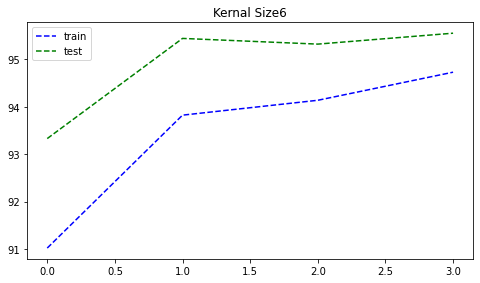

In [79]:
#set figure size   
fig = plt.figure(figsize=(8,20))
row = len(kernelSizes)
column = 1
subcnt = 4
for i in range(1,2):
    plt.subplot(row, column, i)
    plt.title("Kernal Size"+str(kernelSize))
    plt.plot(trainAccuracy,'b--',label='train')
    plt.plot(testAccuracy,'g--',label='test')
    plt.legend()

In [72]:
train_loss, val_loss = [], []
accuracy_total_train, accuracy_total_val = [], []

for epoch in range(n_epochs):
   
    total_train_loss = 0
    total_val_loss = 0

    model.train()
    
    total = 0
    # training our model
    for idx, (image, label) in enumerate(train_loader):

#         image, label = image.to(device), label.to(device)

        optimizer.zero_grad()

        pred = model(image)

        loss = criterion(pred, label)
        total_train_loss += loss.item()

        loss.backward()
        optimizer.step()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1
                
    accuracy_train = total / len(train_set)
    accuracy_total_train.append(accuracy_train)

    total_train_loss = total_train_loss / (idx + 1)
    train_loss.append(total_train_loss)
    
    # validating our model
    model.eval()
    total = 0
    for idx, (image, label) in enumerate(test_loader):
#         image, label = image, label.cuda()
        pred = model(image)
        loss = criterion(pred, label)
        total_val_loss += loss.item()

        pred = torch.nn.functional.softmax(pred, dim=1)
        for i, p in enumerate(pred):
            if label[i] == torch.max(p.data, 0)[1]:
                total = total + 1

    accuracy_val = total / len(test_set)
    accuracy_total_val.append(accuracy_val)

    total_val_loss = total_val_loss / (idx + 1)
    val_loss.append(total_val_loss)

    if epoch % 5 == 0:
      print("Epoch: {}/{}  ".format(epoch, n_epochs),
            "Training loss: {:.4f}  ".format(total_train_loss),
            "Testing loss: {:.4f}  ".format(total_val_loss),
            "Train accuracy: {:.4f}  ".format(accuracy_train),
            "Test accuracy: {:.4f}  ".format(accuracy_val))

Epoch: 0/20   Training loss: 1.4090   Testing loss: 0.8155   Train accuracy: 0.7049   Test accuracy: 0.8422  
Epoch: 5/20   Training loss: 0.3388   Testing loss: 0.3149   Train accuracy: 0.9044   Test accuracy: 0.9151  
Epoch: 10/20   Training loss: 0.2811   Testing loss: 0.2659   Train accuracy: 0.9188   Test accuracy: 0.9243  
Epoch: 15/20   Training loss: 0.2491   Testing loss: 0.2385   Train accuracy: 0.9283   Test accuracy: 0.9316  


I chose to have 20 epochs and from that I can see that the training accuracy started with a quite low and reached as good accuracy and the test accuracy started well to and completed with the best accuracy

In [73]:
trainAccuracy=list(accuracy_total_train)
testAccuracy=list(accuracy_total_val)

#more code here

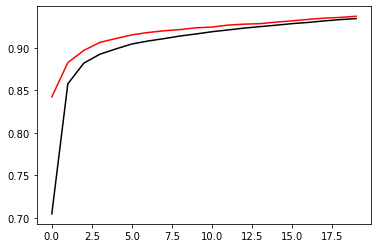

In [76]:
plt.plot(trainAccuracy,'k')
plt.plot(testAccuracy,'r')

From the above plot we can see the test accuracy and the train accuracy with is been opted for the kernel size 2 and 20 epochs. In the starting stage the model was overfiting but in the final stages they were almost the same

I have chosen to have different kernel sizes and I felt i have opted best accuracy resluts for the 4 kernel and for the 5th kernel i felt the model has been overfitted and lost some of the accuracy but i felt it can be changed if i had more epochs for the computation to complete i chosen to have only 1 epoch

Kernel Size: 2 Epoch: 0/1   Training loss: 1.4678   Testing loss: 0.8380   Train accuracy: 0.6987   Test accuracy: 0.8474  
Kernel Size: 3 Epoch: 0/1   Training loss: 1.5123   Testing loss: 0.8995   Train accuracy: 0.6432   Test accuracy: 0.8128  
Kernel Size: 4 Epoch: 0/1   Training loss: 1.6411   Testing loss: 1.0057   Train accuracy: 0.6391   Test accuracy: 0.8275  
Kernel Size: 5 Epoch: 0/1   Training loss: 1.4475   Testing loss: 0.8237   Train accuracy: 0.6839   Test accuracy: 0.8323  


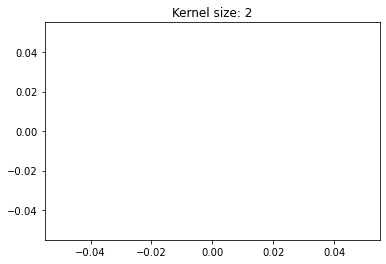

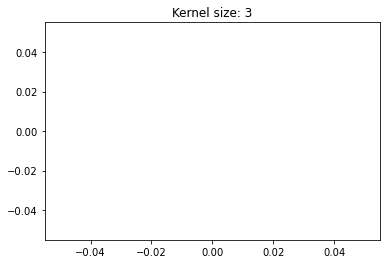

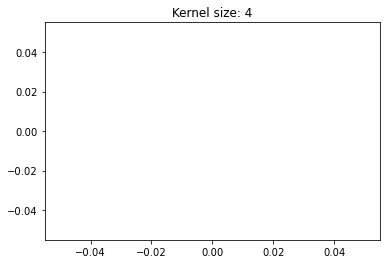

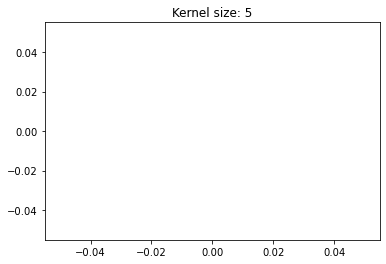

In [118]:
kernelSizes=[2,3,4,5]
n_epochs = 1

for kernelSize in kernelSizes:
    
#             #now plot this
#     plt.figure()
#     plt.plot(trainAccuracy,'k')
#     plt.plot(testAccuracy,'r')
#     plt.title("Kernel size: "+str(kernelSize))
    #instantiate your CNN using kernel size
    model = myCNN()
#     model
    
    #define optimizer and loss function
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    #train and test - you can copy the code 
    train_loss, val_loss = [], []
    accuracy_total_train, accuracy_total_val = [], []
            
    trainAccuracy=list(accuracy_total_train)
    testAccuracy=list(accuracy_total_val)
            #now plot this
    plt.figure()
    plt.plot(trainAccuracy,'k')
    plt.plot(testAccuracy,'r')
    plt.title("Kernel size: "+str(kernelSize))

    for epoch in range(n_epochs):


        total_train_loss = 0
        total_val_loss = 0

        model.train()

        total = 0
            # training our model
        for idx, (image, label) in enumerate(train_loader):

    #         image, label = image.to(device), label.to(device)

            optimizer.zero_grad()

            pred = model(image)

            loss = criterion(pred, label)
            total_train_loss += loss.item()

            loss.backward()
            optimizer.step()

            pred = torch.nn.functional.softmax(pred, dim=1)
            for i, p in enumerate(pred):
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1

        accuracy_train = total / len(train_set)
        accuracy_total_train.append(accuracy_train)

        total_train_loss = total_train_loss / (idx + 1)
        train_loss.append(total_train_loss)

        # validating our model
        model.eval()
        total = 0
        for idx, (image, label) in enumerate(test_loader):
    #         image, label = image, label.cuda()
            pred = model(image)
            loss = criterion(pred, label)
            total_val_loss += loss.item()

            pred = torch.nn.functional.softmax(pred, dim=1)
            for i, p in enumerate(pred):
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1

        accuracy_val = total / len(test_set)
        accuracy_total_val.append(accuracy_val)

        total_val_loss = total_val_loss / (idx + 1)
        val_loss.append(total_val_loss)

        if epoch % 2 == 0:
            print("Kernel Size:", kernelSize,"Epoch: {}/{}  ".format(epoch, n_epochs),
                    "Training loss: {:.4f}  ".format(total_train_loss),
                    "Testing loss: {:.4f}  ".format(total_val_loss),
                    "Train accuracy: {:.4f}  ".format(accuracy_train),
                    "Test accuracy: {:.4f}  ".format(accuracy_val))
#     trainAccuracy=list(accuracy_total_train)
#     testAccuracy=list(accuracy_total_val)
#             #now plot this
#     plt.figure()
#     plt.plot(trainAccuracy,'k')
#     plt.plot(testAccuracy,'r')
#     plt.title("Kernel size: "+str(kernelSize))

Kernel Size: 2 Epoch: 0/1   Training loss: 1.6383   Testing loss: 0.9928   Train accuracy: 0.6571   Test accuracy: 0.8421  
Kernel Size: 3 Epoch: 0/1   Training loss: 1.4355   Testing loss: 0.8215   Train accuracy: 0.7150   Test accuracy: 0.8328  
Kernel Size: 4 Epoch: 0/1   Training loss: 1.7478   Testing loss: 1.1490   Train accuracy: 0.6082   Test accuracy: 0.8120  
Kernel Size: 5 Epoch: 0/1   Training loss: 1.6285   Testing loss: 0.9868   Train accuracy: 0.6460   Test accuracy: 0.8189  


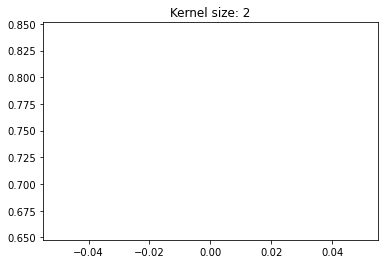

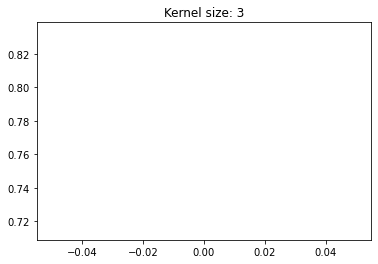

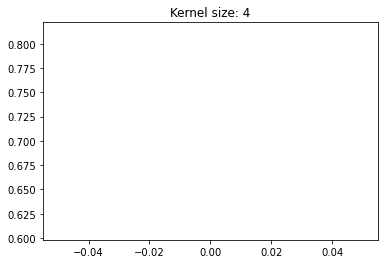

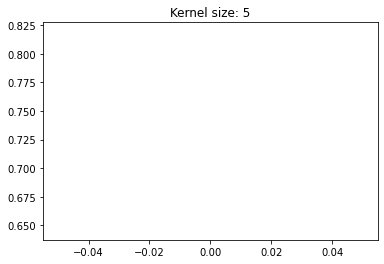

In [126]:
kernelSizes=[2,3,4,5]
n_epochs = 1

for kernelSize in kernelSizes:
    
#             #now plot this
#     plt.figure()
#     plt.plot(trainAccuracy,'k')
#     plt.plot(testAccuracy,'r')
#     plt.title("Kernel size: "+str(kernelSize))
    #instantiate your CNN using kernel size
    model = myCNN()
#     model
    
    #define optimizer and loss function
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()
    #train and test - you can copy the code 
    train_loss, val_loss = [], []
    accuracy_total_train, accuracy_total_val = [], []
            
    trainAccuracy=list(accuracy_total_train)
    testAccuracy=list(accuracy_total_val)
    
    for epoch in range(n_epochs):


        total_train_loss = 0
        total_val_loss = 0

        model.train()

        total = 0
            # training our model
        for idx, (image, label) in enumerate(train_loader):

    #         image, label = image.to(device), label.to(device)

            optimizer.zero_grad()

            pred = model(image)

            loss = criterion(pred, label)
            total_train_loss += loss.item()

            loss.backward()
            optimizer.step()

            pred = torch.nn.functional.softmax(pred, dim=1)
            for i, p in enumerate(pred):
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1


        accuracy_train = total / len(train_set)
        accuracy_total_train.append(accuracy_train)

        total_train_loss = total_train_loss / (idx + 1)
        train_loss.append(total_train_loss)

        # validating our model
        model.eval()
        total = 0
        for idx, (image, label) in enumerate(test_loader):
    #         image, label = image, label.cuda()
            pred = model(image)
            loss = criterion(pred, label)
            total_val_loss += loss.item()

            pred = torch.nn.functional.softmax(pred, dim=1)
            for i, p in enumerate(pred):
                if label[i] == torch.max(p.data, 0)[1]:
                    total = total + 1

        accuracy_val = total / len(test_set)
        accuracy_total_val.append(accuracy_val)

        total_val_loss = total_val_loss / (idx + 1)
        val_loss.append(total_val_loss)

        if epoch % 2 == 0:
            print("Kernel Size:", kernelSize,"Epoch: {}/{}  ".format(epoch, n_epochs),
                    "Training loss: {:.4f}  ".format(total_train_loss),
                    "Testing loss: {:.4f}  ".format(total_val_loss),
                    "Train accuracy: {:.4f}  ".format(accuracy_train),
                    "Test accuracy: {:.4f}  ".format(accuracy_val))
#     trainAccuracy=list(accuracy_total_train)
#     testAccuracy=list(accuracy_total_val)
#             #now plot this
        plt.figure()
        plt.plot(accuracy_total_train,'k')
        plt.plot(accuracy_total_val,'r')
        plt.title("Kernel size: "+str(kernelSize))